####Importing all neccesary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# StandardScaler for Feature Scalling
# LabelEncoder for Encoding categorical data
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

####Loading the dataset

In [2]:
bank_data = pd.read_csv('/content/drive/MyDrive/Datasets /Bank Marketing Dataset/bank.csv')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


##Data Cleaning and Processing

###Dropping the unwanted or unnecessary columns.

Some columns dont add values to the clustering so we will remove them. Columns like day and month.

In [3]:
bank_data.drop(columns = ['day','month'], inplace=True)
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,673,2,-1,0,unknown,yes


###Convert Categorical Columns into Numbers

#### 1. Convert Yes/No values to 0/1. (Label Encoding)

In [4]:
labels_col = ['default','housing','loan','deposit']

for col in labels_col:
  bank_data[col] = bank_data[col].map({ 'yes':1, 'no':0 })

In [5]:
bank_data[['default','housing','loan','deposit']].head()

,default,housing,loan,deposit
0,0,1,0,1
1,0,0,0,1
2,0,1,0,1
3,0,1,0,1
4,0,0,0,1


#### 2.Convert Multi-Category Columns (One-Hot Encoding)

Some columns have multiple categories (like job, marital, education, etc.). We convert them using One-Hot Encoding.

In [6]:
bank_data = pd.get_dummies(bank_data, columns=['job', 'marital', 'education', 'contact', 'poutcome'], drop_first = True)

In [7]:
bank_data.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,deposit,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,59,0,2343,1,0,1042,1,-1,0,1,...,True,False,True,False,False,False,True,False,False,True
1,56,0,45,0,0,1467,1,-1,0,1,...,True,False,True,False,False,False,True,False,False,True
2,41,0,1270,1,0,1389,1,-1,0,1,...,True,False,True,False,False,False,True,False,False,True
3,55,0,2476,1,0,579,1,-1,0,1,...,True,False,True,False,False,False,True,False,False,True
4,54,0,184,0,0,673,2,-1,0,1,...,True,False,False,True,False,False,True,False,False,True


### Feature Scaling (Standarization)

Kmeans works best when all the features are on the same scale. This will ensure that no column domintes due to large values.

In [8]:
scaler = StandardScaler()
bankdata_scaled = scaler.fit_transform(bank_data)

###Finding the best K value by using Elbow Method

🔹 1. n_clusters=k → Number of Groups

This sets how many clusters (K) we want.

In the loop, k changes from 1 to 10 to test different values of K.

Example:

If k=3, KMeans will try to divide the data into 3 groups.

If k=5, it will try to create 5 groups.

🔹 2. init='k-means++' → Smart Initialization

Normally, K-Means randomly picks cluster centers, which can cause bad clustering.

'k-means++' improves this by:

Selecting the first centroid randomly.

Picking the next centroids far from existing ones, ensuring better cluster formation.

This helps reduce WCSS and makes clustering more efficient.

🔹 3. random_state=42 → Reproducibility

K-Means uses randomness to select initial centroids.

random_state=42 makes sure that we get the same results every time we run the code.

If we remove random_state, the clusters may change each time we run the program.



*   kmeans.inertia_  -> Calculates the WCSS (Within-Cluster Sum of Squares) for the current k.
*   wcss.append(...) ->	Adds the calculated WCSS value to the wcss list.

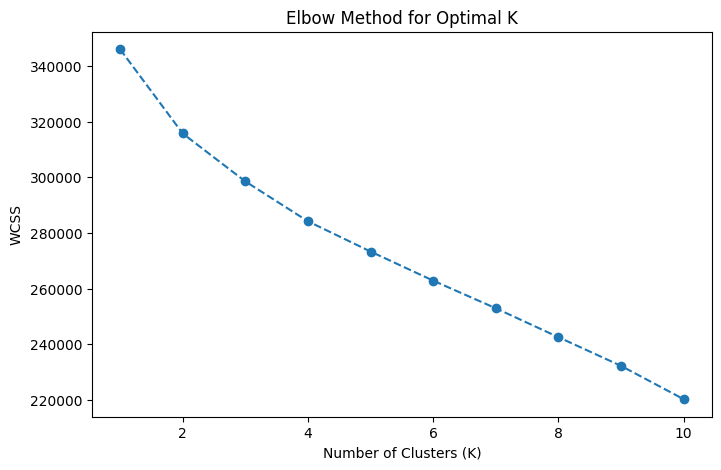

In [9]:
wcss = [] #within-cluster sum of squares
          # It will store the different values of wcss for cluster k.

for k in range (1,11):
  kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)
  kmeans.fit(bankdata_scaled)
  wcss.append(kmeans.inertia_)


#Lets make graph
plt.figure(figsize=(8, 5))
          #x-value     y-value
plt.plot(range(1, 11), wcss, marker='o', linestyle='--') #Draws a circle (o) at each data point for better visibility.
                                                         #Creates a dashed (--) line instead of a solid line.
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()



* It starts steep and then flattens.
* Elbow Point": The point where the decrease in WCSS slows down significantly.
* If we want a simpler clustering, K = 3 is a good choice.
* If we need more detailed clustering, K = 4 could be considered.

Lets consider k best value as 4.

###Applying KMeans Clustering

In [10]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
bank_data['Cluster'] = kmeans.fit_predict(bankdata_scaled)

* df['Cluster'] ->	Creates a new column in the df DataFrame to store the cluster labels.
* kmeans.fit_predict(df_scaled)	-> Runs K-Means clustering on df_scaled and returns the cluster each data point belongs to.
* fit_predict(df_scaled)	-> Fits the model on df_scaled (your scaled dataset).
- Predicts the cluster for each data point.

This assigns each customer to a cluster (0, 1, 2, or 3).

###Understanding the Clusters

####1) Check Cluster Distribution

In [11]:
bank_data['Cluster'].value_counts()

,count
Cluster,
3,5188
1,2709
0,2486
2,779


This shows how many customers are in each cluster.

####2) See the Cluster Characteristics

In [12]:
bank_data.groupby('Cluster').mean()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,deposit,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
Cluster,,,,,,,,,,,,,,,,,,,,,
0,39.281979,0.004425,1650.455350,0.487932,0.103781,342.354787,1.917538,212.384151,3.355189,0.666533,...,0.530571,0.378520,0.501207,0.374095,0.046259,0.057522,0.007643,0.202333,0.376911,0.000000
1,38.951274,0.016980,1729.552233,0.393503,0.104097,372.397933,2.694352,3.060539,0.060170,0.455519,...,0.507198,0.383167,0.002584,0.962348,0.015873,0.051680,0.186047,0.000000,0.000000,0.967147
2,65.539153,0.006418,2420.523748,0.155327,0.070603,390.641849,2.132221,51.454429,0.969191,0.664955,...,0.749679,0.033376,0.401797,0.178434,0.064185,0.223363,0.115533,0.043646,0.172015,0.690629
3,39.707402,0.020432,1231.220123,0.555320,0.166731,383.185235,2.750964,-0.657479,0.006554,0.362375,...,0.592521,0.291635,0.753662,0.002506,0.055705,0.061103,0.334040,0.000000,0.000000,0.996145


This helps us understand each cluster’s financial behavior.

###Doing the findings using excel or spreadsheets.

First downloading the dataset with cluster column.

In [13]:
bank_data.to_csv('clustered_data.csv', index=False)

In [14]:
from google.colab import files
files.download('clustered_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Visualizing the Clusters

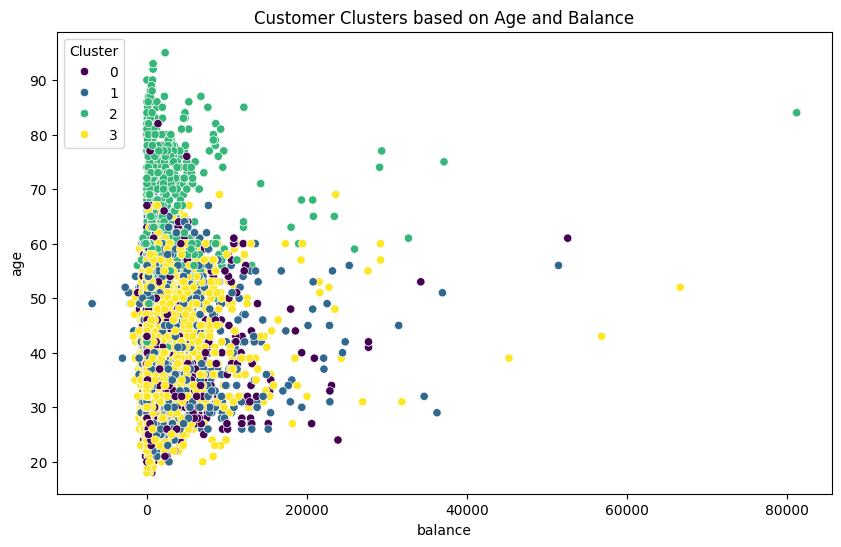

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=bank_data['balance'], y=bank_data['age'], hue=bank_data['Cluster'], palette='viridis')
plt.title('Customer Clusters based on Age and Balance')
plt.show()
